<a href="https://colab.research.google.com/github/BlackCurrantDS/ATiML-Project/blob/master/4_Vader_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importing the file
import pandas as pd
#books = pd.read_csv("books_train.csv", index_col=0)
books = pd.read_csv("books_validation.csv", index_col=0)
#books = pd.read_csv("books_test.csv", index_col=0)
books.reset_index(inplace = True)
books.head(5)

,index,data,FileNo,Book_Name,genre,Author_Name
0,272,"""Squire Carrington's carriage, this way, pleas...",34947,The House of Strange Secrets: A Detective Story,Detective and Mystery,Bayly| A. Eric
1,747,"G. A. HENTY Author of ""With Buller in Natal"" ""...",48297,A Soldier's Daughter- and Other Stories,Sea and Adventure,Henty| G. A.
2,175,"""As a recounter of stories of mingled mystery ...",27549,The Seven Secrets,Detective and Mystery,Anstey| F.
3,42,"Looking back now, after so many months of stru...",16968,The Bad Man: A Novel,Literary,Browne| Porter Emerson| Towne| Charles Hanson
4,473,"First and foremost it should be stated how I, ...",37081,In Strange Company: A Story of Chili and the S...,Sea and Adventure,Boothby| Guy


In [0]:
del books['index']

In [3]:
pip install vaderSentiment

     |████████████████████████████████| 133kB 2.8MB/s 


In [4]:
import nltk
nltk.download('stopwords')
import nltk
nltk.download('punkt')
import nltk
nltk.download('averaged_perceptron_tagger')
import nltk
nltk.download('wordnet')
import nltk
nltk.download('maxent_ne_chunker')
import nltk
nltk.download('words')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [0]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from nltk import sent_tokenize

def positive(text):
  analyzer = SentimentIntensityAnalyzer()
  sentences = sent_tokenize(text)
  c_pos = 0
  number_of_sen = len(sentences)
  for i in sentences:
    vs = analyzer.polarity_scores(i)
    c_pos += vs['pos'] / number_of_sen
    return c_pos

def negative(text):
  analyzer = SentimentIntensityAnalyzer()
  sentences = sent_tokenize(text)
  c_pos = 0
  number_of_sen = len(sentences)
  for i in sentences:
    vs = analyzer.polarity_scores(i)
    c_pos += vs['neg'] / number_of_sen
    return c_pos
    
def neutral(text):
  analyzer = SentimentIntensityAnalyzer()
  sentences = sent_tokenize(text)
  c_pos = 0
  number_of_sen = len(sentences)
  for i in sentences:
    vs = analyzer.polarity_scores(i)
    c_pos += vs['neu'] / number_of_sen
    return c_pos
    
def compound(text):
  analyzer = SentimentIntensityAnalyzer()
  sentences = sent_tokenize(text)
  c_pos = 0
  number_of_sen = len(sentences)
  for i in sentences:
    vs = analyzer.polarity_scores(i)
    c_pos += vs['compound'] / number_of_sen
    return c_pos


In [0]:
def sentiment_analysis(books):
    df = books.copy() 
    
    df['positive'] = df.data.apply(positive)
    df['negative'] = df.data.apply(negative)
    df['neutral'] = df.data.apply(neutral)
    df['compund'] = df.data.apply(compound)
    return df


In [0]:
df_senti = sentiment_analysis(books)

In [8]:
df_senti.head(10)

,data,FileNo,Book_Name,genre,Author_Name,positive,negative,neutral,compund
0,"""Squire Carrington's carriage, this way, pleas...",34947,The House of Strange Secrets: A Detective Story,Detective and Mystery,Bayly| A. Eric,0.000101,0.000000,0.000245,0.000254
1,"G. A. HENTY Author of ""With Buller in Natal"" ""...",48297,A Soldier's Daughter- and Other Stories,Sea and Adventure,Henty| G. A.,0.000000,0.000000,0.000459,0.000000
2,"""As a recounter of stories of mingled mystery ...",27549,The Seven Secrets,Detective and Mystery,Anstey| F.,0.000069,0.000000,0.000140,0.000175
3,"Looking back now, after so many months of stru...",16968,The Bad Man: A Novel,Literary,Browne| Porter Emerson| Towne| Charles Hanson,0.000017,0.000022,0.000123,-0.000004
4,"First and foremost it should be stated how I, ...",37081,In Strange Company: A Story of Chili and the S...,Sea and Adventure,Boothby| Guy,0.000000,0.000000,0.000328,0.000000
5,"The sun had set behind the mountains, and the ...",7842,The Rise of Iskander,Literary,Disraeli| Earl of Beaconsfield Benjamin,0.000089,0.000000,0.000543,0.000353
6,"I told my story, and the three fellows listene...",41314,My Danish Sweetheart: A Novel. Volume 2 of 3,Sea and Adventure,Russell| William Clark,0.000000,0.000000,0.000339,0.000000
7,A Detective Story\nA.B.M. Fellow-Sherlockian\n...,10067,The Mystery of the Boule Cabinet: A Detective ...,Detective and Mystery,Stevenson| Burton Egbert,0.000000,0.000000,0.000198,0.000000
8,E-text prepared by Al Haines\nIt began somewhe...,18443,Parrot & Co.,Literary,MacGrath| Harold,0.000009,0.000000,0.000187,0.000044
9,That second week of July was not altogether pe...,41340,Mount Royal: A Novel. Volume 2 of 3,Literary,Braddon| M. E.,0.000000,0.000000,0.000375,0.000000


In [0]:
del df_senti['data']
del df_senti['Book_Name']
del df_senti['Author_Name']

In [10]:
df_senti.head(5)

,FileNo,genre,positive,negative,neutral,compund
0,34947,Detective and Mystery,0.000101,0.000000,0.000245,0.000254
1,48297,Sea and Adventure,0.000000,0.000000,0.000459,0.000000
2,27549,Detective and Mystery,0.000069,0.000000,0.000140,0.000175
3,16968,Literary,0.000017,0.000022,0.000123,-0.000004
4,37081,Sea and Adventure,0.000000,0.000000,0.000328,0.000000


In [0]:
#df_senti.to_csv("vader_sentiment_train.csv")
df_senti.to_csv("vader_sentiment_validation.csv")
#df_senti.to_csv("vader_sentiment_test.csv")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


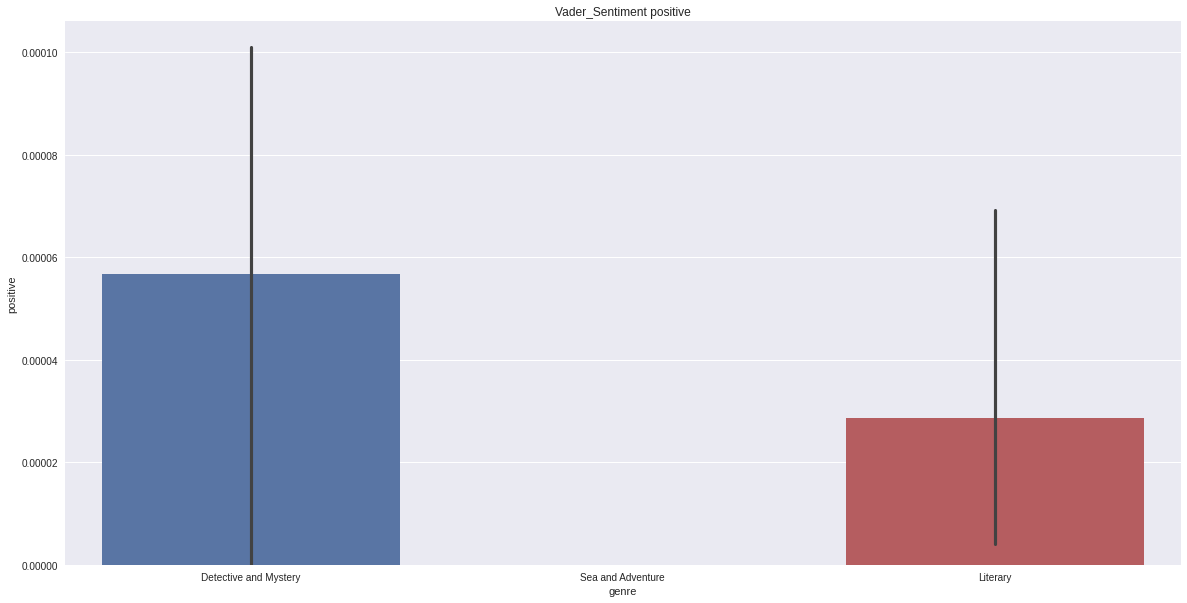

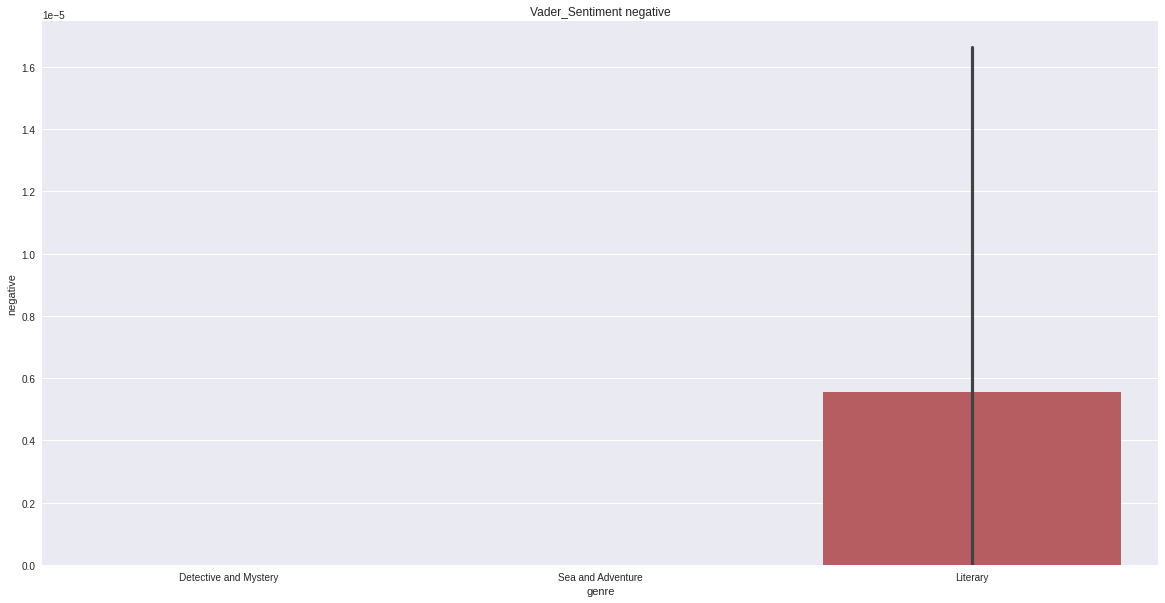

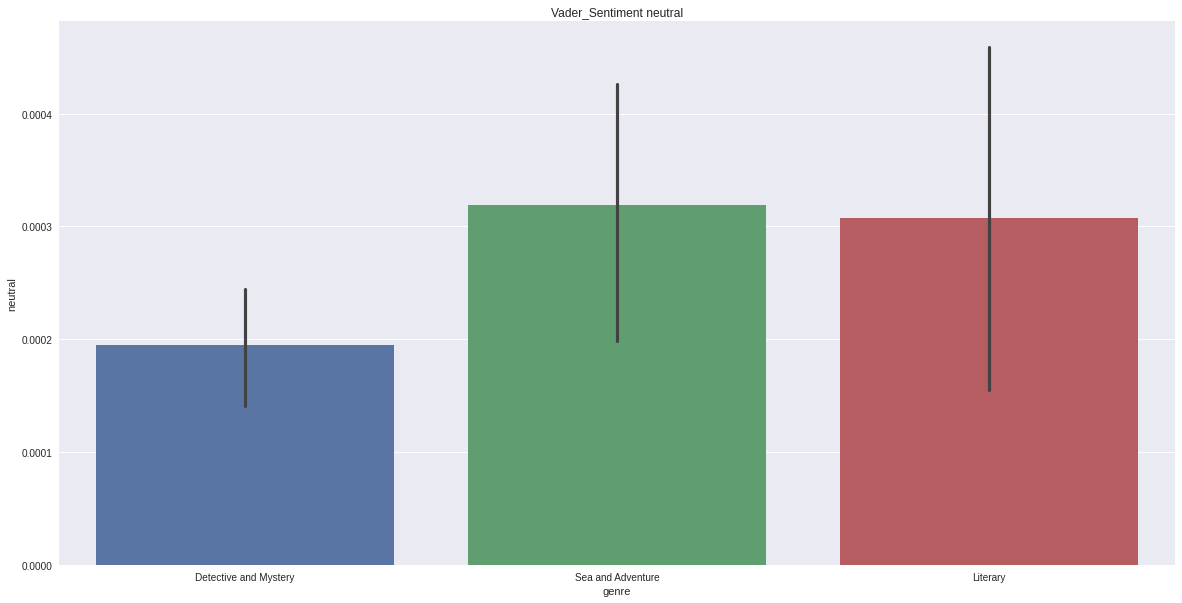

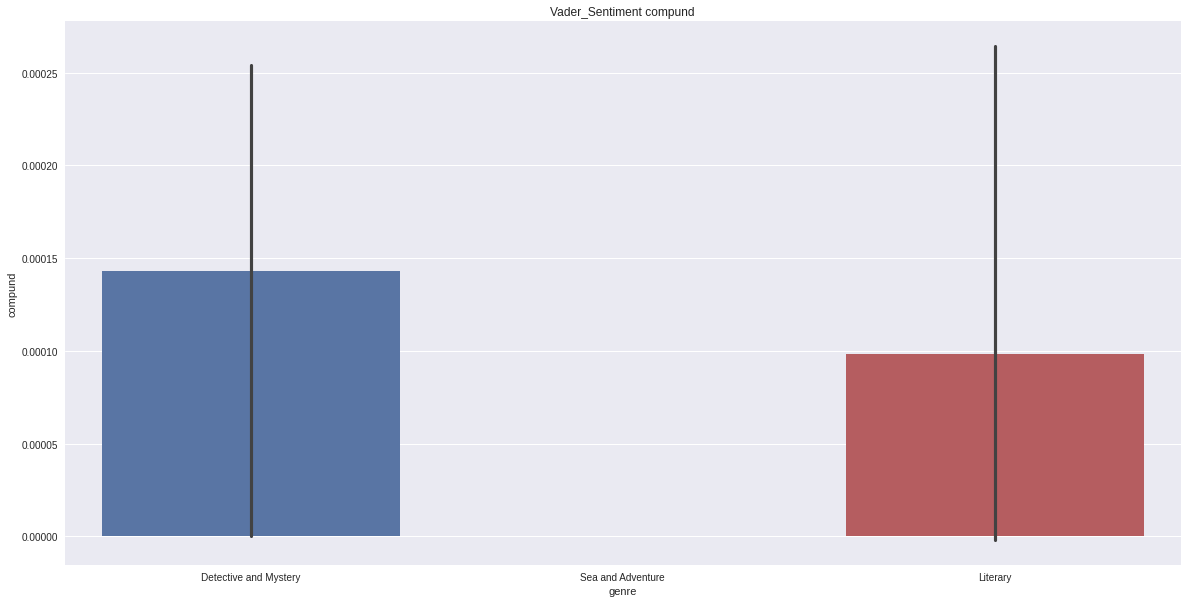

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
for c in df_senti.columns[2:]:
    plt.figure(figsize=(20,10))
    plt.style.use('seaborn')
    sns.barplot(x='genre', y=c, data=df_senti)
    plt.title('Vader_Sentiment {}'.format(c))
    plt.savefig('Vader_Sentiment {}'.format(c))
    plt.show()